# Criando modelo de classificação por linhagem

Pergunta - é possivel criar um modelo que classifique as imagens baseado nas imagens?

Aqui, temos 9 linhagens diferentes e o objetivo é criar um modelo que seja capaz de identifica - las através da imagem de microscopia. Para isso, é necessário criar 9 classes diferentes (rótulos) e criar um modelo de multiclasses.

Como colocar os rótulos (y) em 9 classes (categorias) diferentes?

Importação das Bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install util-gfsilveira

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#encontrar e caminhar pelos arquivos
import os
#estruturação dos dados de imagens para matriz numérica
import numpy as np
#salvar os dados em diferentes arquivos
import joblib
#deixando os arquivos salvos com a data do dia que o código correu
from util import meus_uteis, timeProcess, mask_corr_graphic, printLis



In [4]:
#separando os dados em treino e teste
from sklearn.model_selection import train_test_split
#separando as categorias da classificação
from keras.utils import to_categorical

In [5]:
#avaliação da métrica do modelo
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report #qualidade do algoritmo
#camadas do cnn
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten #camadas da rede neural
#selecioando sequential da rede
from keras.models import Sequential #rede neural

In [6]:
import seaborn as sns #plotar gráficos
import matplotlib.pyplot as plt #plotar gráficos

In [7]:
#serve para adicionar data 
data = timeProcess()[1]

# Listas de imagens de todas as linhagens

In [8]:
# #buscando no drive a pasta onde está a lista de imagens já "aumentadas"
# diretorio = "/content/drive/MyDrive/Classificação_imagens_DOC_CNN/Acho que está errado - ver"
# lista_dados = os.listdir(diretorio)
# printLis(lista_dados)


In [9]:
from PIL import Image


In [10]:
imagens_THP1 = '/content/drive/MyDrive/Imagens_doc_linhagens/5_Imagens_mAb_Macrofagos_THP1_30_09_22_Ana_Paula' #diretório
img_key = 0 #Chave da primeira imagem

lista_novas_img = os.listdir(imagens_THP1)

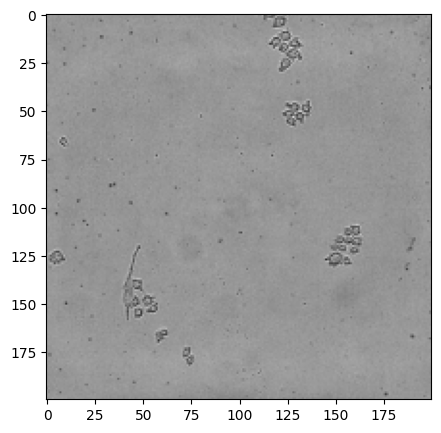

In [11]:
#testando as imagens
resize_img = (200,200) #tamanho da imagem
image_test = imagens_THP1 +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

somando as imagens de cada linhagem

Linhagem THP1

imagens THP1

In [12]:
#carregando as imagens que foram salvas em outro código - "nome-código"
imagem_thp_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/soma_imagens_THP12023-3-15.gz')
imagem_thp_soma.shape

(1696, 200, 200, 3)

imagens SH-SY5Y

In [13]:
imagens_sh = '/content/drive/MyDrive/Imagens_doc_linhagens/6_Imagens_SH-SY5Y_21_09_22_Projeto_Ana_Paula' #diretório
img_key = 0 #Chave da primeira imagem

lista_novas_img = os.listdir(imagens_sh)

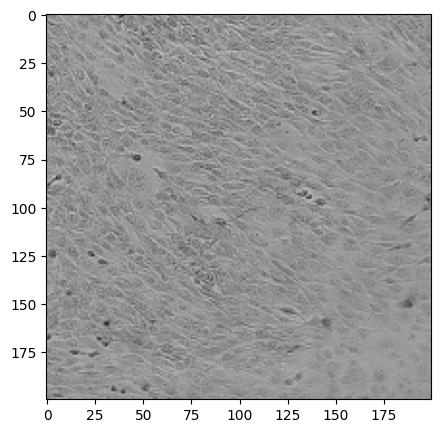

In [14]:
#testando as imagens
resize_img = (200,200) #tamanho da imagem
image_test = imagens_sh +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

In [15]:
#carregando as imagens que foram salvas em outro código - "nome-código"
imagem_sh_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/SH-SY5Y-KERNEL-ADD2023-4-10.gz')
imagem_sh_soma.shape

(1168, 200, 200, 3)

imagens A172

In [16]:
imagens_a172 = '/content/drive/MyDrive/Imagens_doc_linhagens/7_Imagens_A172_21_09_22_Projeto_Ana_Paula' #diretório
img_key = 0 #Chave da primeira imagem

lista_novas_img = os.listdir(imagens_a172)

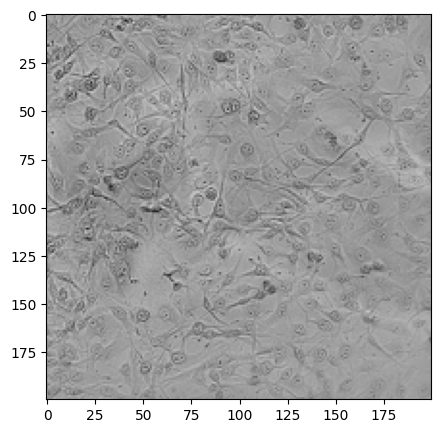

In [17]:
#testando as imagens
resize_img = (200,200) #tamanho da imagem
image_test = imagens_a172 +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

In [18]:
#carregando as imagens que foram salvas em outro código - "nome-código"
imagem_A172_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/soma_imagens_A172-2023-3-15.gz')
imagem_A172_soma.shape

(1584, 200, 200, 3)

imagens MAYV

In [19]:
imagens_mayv = '/content/drive/MyDrive/Imagens_doc_linhagens/8_Imagens_MAYV_21_09_22_Projeto_Ana_Paula' #diretório
img_key = 0 #Chave da primeira imagem

lista_novas_img = os.listdir(imagens_mayv)

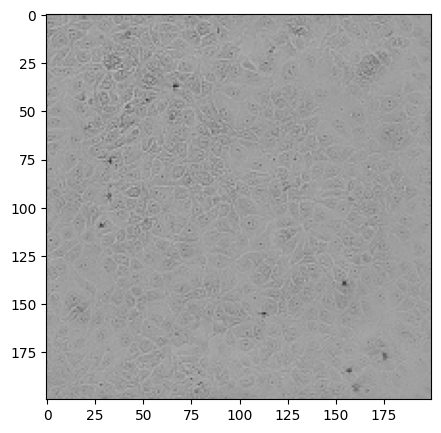

In [20]:
#testando as imagens
resize_img = (200,200) #tamanho da imagem
image_test = imagens_mayv +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

In [21]:
imagem_mayv_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/MAYV-KERNEL-ADD-2023-4-11.gz')
imagem_mayv_soma.shape

(1280, 200, 200, 3)

imagens DENV - HUH7

In [22]:
imagens_denv_huh7 = '/content/drive/MyDrive/Imagens_doc_linhagens/9_Imagens_mAb_DENV1_20_09_22_Projeto_Ana_Paula' #diretório
img_key = 0 #Chave da primeira imagem

lista_novas_img = os.listdir(imagens_denv_huh7)

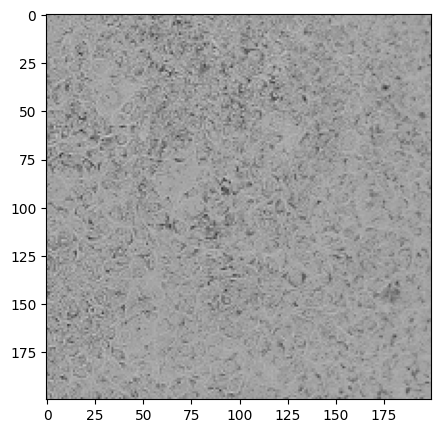

In [23]:
#testando as imagens
resize_img = (200,200) #tamanho da imagem
image_test = imagens_denv_huh7 +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

In [24]:
#carregando as imagens que foram salvas em outro código - "nome-código"
imagem_denv_huh7_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/DENV-KERNEL-ADD-2023-4-11.gz')
imagem_denv_huh7_soma.shape

(1520, 200, 200, 3)

imagens VERO6

In [25]:
imagens_vero = '/content/drive/MyDrive/Imagens_doc_linhagens/4_Imagens_VERO6_20_09_22_Projeto_Allan' #diretório
img_key = 0 #Chave da primeira imagem

lista_novas_img = os.listdir(imagens_vero)

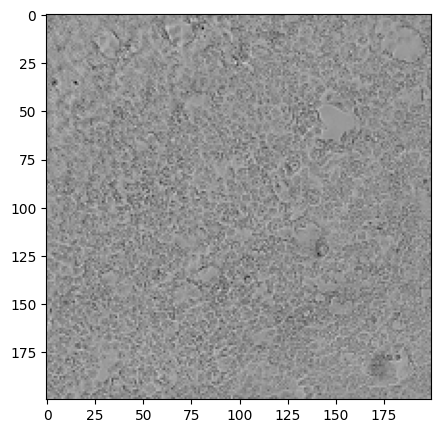

In [26]:
#testando as imagens
resize_img = (200,200) #tamanho da imagem
image_test = imagens_vero +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

In [27]:
#carregando as imagens que foram salvas em outro código - "nome-código"
imagem_vero_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/soma_imagens_VERO6-2023-3-15.gz')
imagem_vero_soma.shape

(1792, 200, 200, 3)

imagens A549

In [28]:
imagens_a549 = '/content/drive/MyDrive/Imagens_doc_linhagens/1_imagens operetta A549 - Julia' #diretório
img_key = 0 #Chave da primeira imagem

lista_novas_img = os.listdir(imagens_a549)

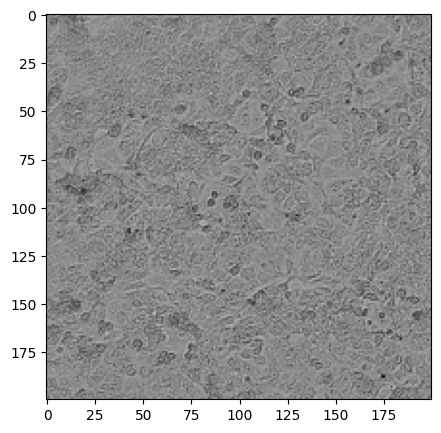

In [29]:
#testando as imagens
resize_img = (200,200) #tamanho da imagem
image_test = imagens_a549 +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

In [30]:
#carregando as imagens que foram salvas em outro código - "nome-código"
imagem_A549_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/A549-KERNEL-ADD-2023-4-11.gz')
imagem_A549_soma.shape

(1136, 200, 200, 3)

imagens HUH7

In [31]:
# imagens_huh7 = '/content/drive/MyDrive/Imagens_doc_linhagens/2_imagens_operetta_huh7' #diretório
# img_key = 0 #Chave da primeira imagem

# lista_novas_img = os.listdir(imagens_huh7)

In [32]:
# #testando as imagens
# resize_img = (200,200) #tamanho da imagem
# image_test = imagens_huh7 +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
# img = Image.open(image_test) #abrinado a primeira imagem
# img = img.resize(resize_img) #formatando o tamanho

# #visualização da imagem
# plt.figure(figsize=(5,5))
# plt.imshow(img)
# plt.show()

In [33]:
# #carregando as imagens que foram salvas em outro código - "nome-código"
# imagem_Huh7_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/soma_imagens_HUH7-2023-3-15.gz')
# imagem_Huh7_soma.shape

imagens 3T3

In [34]:
imagens_3t3 = '/content/drive/MyDrive/Imagens_doc_linhagens/3_imagens_3T3/Imagens_3T3_27_07_2021_Projeto_Ari_Ale' #diretório
img_key = 0 #Chave da primeira imagem

lista_novas_img = os.listdir(imagens_3t3)

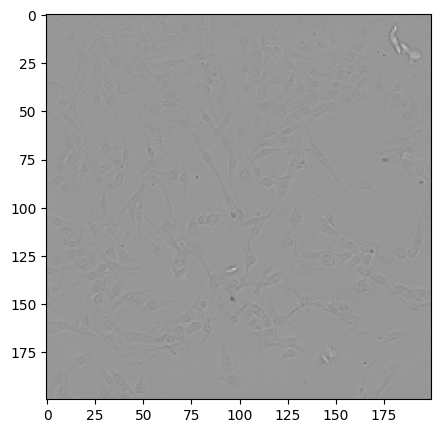

In [35]:
#testando as imagens
resize_img = (200,200) #tamanho da imagem
image_test = imagens_3t3 +'/'+ lista_novas_img[img_key] #chamando a primeira imagem
img = Image.open(image_test) #abrinado a primeira imagem
img = img.resize(resize_img) #formatando o tamanho

#visualização da imagem
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

In [36]:
#carregando as imagens que foram salvas em outro código - "nome-código"
imagem_3T3_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/soma_imagens_3T3-2023-3-15.gz')
imagem_3T3_soma.shape

(832, 200, 200, 3)

Somando todas as imagens do banco

In [37]:
#somando todas as imagens de cada linhagem num banco só
soma_imagens = np.asarray(list(imagem_thp_soma) + list(imagem_sh_soma) + list(imagem_mayv_soma)
                          + list(imagem_A172_soma) + list(imagem_denv_huh7_soma) + list(imagem_vero_soma)
                          + list(imagem_A549_soma) + list(imagem_3T3_soma))
soma_imagens.shape

(11008, 200, 200, 3)

**TRABALHANDO COM OS RÓTULOS**

Rótulo THP1

In [38]:
#carregando os rótulos que foram salvas em outro código - "nome-código"
rot_thp_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/rotulos_somados_THP1-2023-3-15.gz')
rot_thp_soma.shape

(1696,)

In [39]:
#substituindo o nome da linhagem por uma classe numérica - LINHAGEM THP = 1
rot_thp_soma[rot_thp_soma == 'THP1' ] = 1

In [40]:
#conferindo se deu certo. E deu.
rot_thp_soma

array(['1', '1', '1', ..., '1', '1', '1'], dtype='<U4')

Rótulo SH-SY5Y

In [41]:
#carregando os rótulos que foram salvas em outro código - "nome-código"
rot_sh_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/rotulos_somados_SH-SY5Y-2023-3-15.gz')
rot_sh_soma.shape

(1168,)

In [42]:
#substituindo o nome da linhagem por uma classe numérica - LINHAGEM SH-SY = 2
rot_sh_soma[rot_sh_soma == 'SH-SY5Y' ] = 2

In [43]:
rot_sh_soma

array(['2', '2', '2', ..., '2', '2', '2'], dtype='<U7')

Rótulos A172

In [44]:
#carregando os rótulos que foram salvas em outro código - "nome-código"
rot_A172_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/rotulos_somados_A172-2023-3-15.gz')
rot_A172_soma.shape

(1584,)

In [45]:
#substituindo o nome da linhagem por uma classe numérica - LINHAGEM A172 = 3
rot_A172_soma[rot_A172_soma == 'A172' ] = 3

In [46]:
rot_A172_soma

array(['3', '3', '3', ..., '3', '3', '3'], dtype='<U4')

Rótulos MAYV

In [47]:
#carregando os rótulos que foram salvas em outro código - "nome-código"
rot_mayv_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/rotulos_somados_MAYV-2023-3-15.gz')
rot_mayv_soma.shape

(1280,)

In [48]:
#substituindo o nome da linhagem por uma classe numérica - LINHAGEM MAYV = 4
rot_mayv_soma[rot_mayv_soma == 'MAYV' ] = 4

In [49]:
rot_mayv_soma

array(['4', '4', '4', ..., '4', '4', '4'], dtype='<U4')

Rótulos DENV - HUH7

In [50]:
#carregando os rótulos que foram salvas em outro código - "nome-código"
rot_denv_huh7_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/rotulos_somados_DENV-2023-3-15.gz')
rot_denv_huh7_soma.shape

(1520,)

In [51]:
#substituindo o nome da linhagem por uma classe numérica - LINHAGEM DENV = 5
rot_denv_huh7_soma[rot_denv_huh7_soma == 'mAb_DENV1' ] = 5

In [52]:
rot_denv_huh7_soma

array(['5', '5', '5', ..., '5', '5', '5'], dtype='<U9')

Rótulos VERO6

In [53]:
#carregando os rótulos que foram salvas em outro código - "nome-código"
rot_vero_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/rotulos_somados_VERO6-2023-3-15.gz')
rot_vero_soma.shape

(1792,)

In [54]:
#substituindo o nome da linhagem por uma classe numérica - LINHAGEM VERO = 6
rot_vero_soma[rot_vero_soma == 'VERO6' ] = 6

In [55]:
rot_vero_soma

array(['6', '6', '6', ..., '6', '6', '6'], dtype='<U5')

Rótulos A549

In [56]:
#carregando os rótulos que foram salvas em outro código - "nome-código"
rot_A549_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/rotulos_somados_A549-2023-3-15.gz')
rot_A549_soma.shape

(1136,)

In [57]:
#substituindo o nome da linhagem por uma classe numérica - LINHAGEM A549 = 7
rot_A549_soma[rot_A549_soma == 'A549' ] = 7

In [58]:
rot_A549_soma

array(['7', '7', '7', ..., '7', '7', '7'], dtype='<U4')

Rótulos Huh7

In [59]:
#carregando os rótulos que foram salvas em outro código - "nome-código"
# rot_Huh7_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/rotulos_somados_HUH7-2023-3-15.gz')
# rot_Huh7_soma.shape

In [60]:
#substituindo o nome da linhagem por uma classe numérica - LINHAGEM HUH7 = 8
# rot_Huh7_soma[rot_Huh7_soma == 'ajuste_huh7' ] = 'Huh7'

In [61]:
#substituindo o nome da linhagem por uma classe numérica - LINHAGEM Huh7 = 8
# rot_Huh7_soma[rot_Huh7_soma == 'Huh7' ] = 8

In [62]:
# rot_Huh7_soma.shape

Rótulos 3T3

In [63]:
#carregando os rótulos que foram salvas em outro código - "nome-código"
rot_3T3_soma = joblib.load('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens e rótulos para classificação 14-03-23/rotulos_somados_3T3-2023-3-15.gz')
rot_3T3_soma.shape

(832,)

In [64]:
#substituindo o nome da linhagem por uma classe numérica - LINHAGEM 3T3 = 9
rot_3T3_soma[rot_3T3_soma == '3T3' ] = 8

In [65]:
rot_3T3_soma.shape

(832,)

Somando todos os rótulos com cada classe

In [66]:
soma_rot_class = np.asarray(list(rot_thp_soma) + list(rot_sh_soma) + list(rot_mayv_soma) + list(rot_A172_soma) +
                        list(rot_denv_huh7_soma) + list(rot_vero_soma) + list(rot_A549_soma) + 
                        list(rot_3T3_soma))

In [67]:
#vendo se a soma deu certo
np.unique(soma_rot_class)

array(['1', '2', '3', '4', '5', '6', '7', '8'], dtype='<U1')

In [68]:
#testando outra maneira de trabalhar com os rótulos
# sei_la = [1] * 832
# vamos_ver = np.array(sei_la)
#type(vamos_ver)

Separando validação

In [69]:
imagens_teste = soma_imagens.shape[0] * 0.9 #pegando só das imagens 30% das imagens vai para o teste
imagens_treino = soma_imagens.shape[0] - imagens_teste #restante das imagens (70%)
print('Data for Modeling: ' + str(imagens_teste))
print('Unseen Data For Predictions: ' + str(imagens_treino))

Data for Modeling: 9907.2
Unseen Data For Predictions: 1100.7999999999993


In [70]:
zeros = list(np.zeros(9908))
ones = list(np.ones(1100))
lista = np.array(zeros + ones)
lista

array([0., 0., 0., ..., 1., 1., 1.])

In [71]:
import random


In [72]:
random.shuffle(lista)
lista_valida = [True if i == 1 else False for i in lista]
lista_treino_test = [False if i == 1 else True for i in lista]
np.array(lista_valida)

array([False, False, False, ..., False, False, False])

In [73]:
#imagens
x_valida = soma_imagens[lista_valida]
x_treino_test = soma_imagens[lista_treino_test]

print(x_valida.shape)
print(x_treino_test.shape)

(1100, 200, 200, 3)
(9908, 200, 200, 3)


In [74]:
#rótulos
y_valida = soma_rot_class[lista_valida]
y_treino_test = soma_rot_class[lista_treino_test]

print(y_valida.shape)
print(y_treino_test.shape)

(1100,)
(9908,)


In [75]:
np.unique(y_valida)

array(['1', '2', '3', '4', '5', '6', '7', '8'], dtype='<U1')

In [109]:
#Salvando 10$ das imagens para validação
#joblib.dump(x_valida, '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens_validação_10%_class_'+data+'.gz')
#joblib.dump(y_valida, '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/rótulos_validação_10%_class_'+data+'.gz')

['/content/drive/MyDrive/Classificação_imagens_DOC_CNN/rótulos_validação_10%_class_2023-5-10.gz']

Separando imagens e rótulos em treinamento e teste

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x_treino_test,y_treino_test, test_size=0.3, random_state=0)
#variáveis recebem o número de imagens para tes e treino
print(f'{X_train.shape} \n{X_test.shape} \n{y_train.shape} \n{y_test.shape}')

(6935, 200, 200, 3) 
(2973, 200, 200, 3) 
(6935,) 
(2973,)


In [78]:
len(np.unique(y_test))

8

In [79]:
#Salvando 10$ das imagens para validação
#joblib.dump(x_valida, '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/imagens_validação_10%_class_'+data+'.gz')
#joblib.dump(y_valida, '/content/drive/MyDrive/Classificação_imagens_DOC_CNN/rótulos_validação_10%_class_'+data+'.gz')

Separando as categorias

In [80]:
#ver se fiz certo
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [81]:
y_train[:5]

array(['5', '6', '2', '4', '2'], dtype='<U1')

In [82]:
y_test_cat.shape

(2973, 9)

In [83]:
print(y_test_cat[:,0].sum())
print(y_test_cat[:,1].sum())
print(y_test_cat[:,2].sum())
print(y_test_cat[:,3].sum())
print(y_test_cat[:,4].sum())
print(y_test_cat[:,5].sum())
print(y_test_cat[:,6].sum())
print(y_test_cat[:,7].sum())
print(y_test_cat[:,8].sum())

0.0
461.0
317.0
432.0
336.0
395.0
497.0
315.0
220.0


In [84]:
print(y_train_cat[:,0].sum())
print(y_train_cat[:,1].sum())
print(y_train_cat[:,2].sum())
print(y_train_cat[:,3].sum())
print(y_train_cat[:,4].sum())
print(y_train_cat[:,5].sum())
print(y_train_cat[:,6].sum())
print(y_train_cat[:,7].sum())
print(y_train_cat[:,8].sum())

0.0
1084.0
739.0
1023.0
811.0
957.0
1101.0
700.0
520.0


In [85]:
y_test = y_test_cat[:,1:]
y_test.shape

(2973, 8)

In [86]:
y_train = y_train_cat[:,1:]
y_train.shape

(6935, 8)

MODELO DE CLASSIFICAÇÃO

In [87]:
#carregando o modelo
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(200, 200, 3))) #32 numero de camadas
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(512, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

Correndo treinamento e teste

In [88]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [89]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=18)

In [90]:
# fit model
history = model.fit(X_train,y_train,
                    validation_data=(X_test, y_test), 
                    epochs=200, verbose=2, 
                    callbacks=[es]
                     )

Epoch 1/200
217/217 - 26s - loss: 2.3289 - accuracy: 0.4395 - val_loss: 0.9332 - val_accuracy: 0.6051 - 26s/epoch - 118ms/step
Epoch 2/200
217/217 - 9s - loss: 0.8457 - accuracy: 0.6490 - val_loss: 0.8035 - val_accuracy: 0.6599 - 9s/epoch - 42ms/step
Epoch 3/200
217/217 - 9s - loss: 0.7400 - accuracy: 0.7107 - val_loss: 0.9576 - val_accuracy: 0.5957 - 9s/epoch - 43ms/step
Epoch 4/200
217/217 - 9s - loss: 0.6952 - accuracy: 0.7211 - val_loss: 0.5026 - val_accuracy: 0.7995 - 9s/epoch - 43ms/step
Epoch 5/200
217/217 - 9s - loss: 0.5711 - accuracy: 0.7743 - val_loss: 0.5336 - val_accuracy: 0.8106 - 9s/epoch - 43ms/step
Epoch 6/200
217/217 - 9s - loss: 0.4791 - accuracy: 0.8141 - val_loss: 0.5051 - val_accuracy: 0.8103 - 9s/epoch - 43ms/step
Epoch 7/200
217/217 - 10s - loss: 0.4461 - accuracy: 0.8245 - val_loss: 0.5621 - val_accuracy: 0.7750 - 10s/epoch - 45ms/step
Epoch 8/200
217/217 - 9s - loss: 0.4293 - accuracy: 0.8330 - val_loss: 0.4249 - val_accuracy: 0.8372 - 9s/epoch - 44ms/step
Epo

In [91]:
# #Treinando o modelo
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

AVALIANDO A ACURÁCIA

In [92]:
#avaliação da matriz de confusão
prev = model.predict(X_test)
y_test_matrix = [np.argmax(t) for t in y_test]
y_pred_matrix = [np.argmax(t) for t in prev]
confusion_matrix(y_test_matrix, y_pred_matrix)

93/93 [==============================] - 1s 12ms/step


array([[458,   0,   0,   0,   0,   0,   0,   3],
       [  0, 200,   2,  83,  29,   0,   3,   0],
       [  1,   0, 431,   0,   0,   0,   0,   0],
       [  0,  22,   3, 293,  15,   0,   3,   0],
       [  0,  45,   0,  51, 298,   0,   1,   0],
       [  0,   0,   1,   0,   0, 496,   0,   0],
       [  0,  44,   0,  11,   6,   0, 254,   0],
       [ 10,   0,   0,   0,   0,   0,   0, 210]])

In [93]:
prev.shape

(2973, 8)

In [94]:
import pandas as pd

In [95]:
array_heatmap = confusion_matrix(y_test_matrix, y_pred_matrix)
#array_heatmap

In [96]:
data_heat = pd.DataFrame(array_heatmap)
data_heat.columns = ['THP1', 'SH-SY5Y','A172','MAYV','HUH7','VERO6','A549','3T3']
data_heat.index = ['THP1', 'SH-SY5Y','A172','MAYV','HUH7','VERO6','A549','3T3']

type(data_heat)


pandas.core.frame.DataFrame

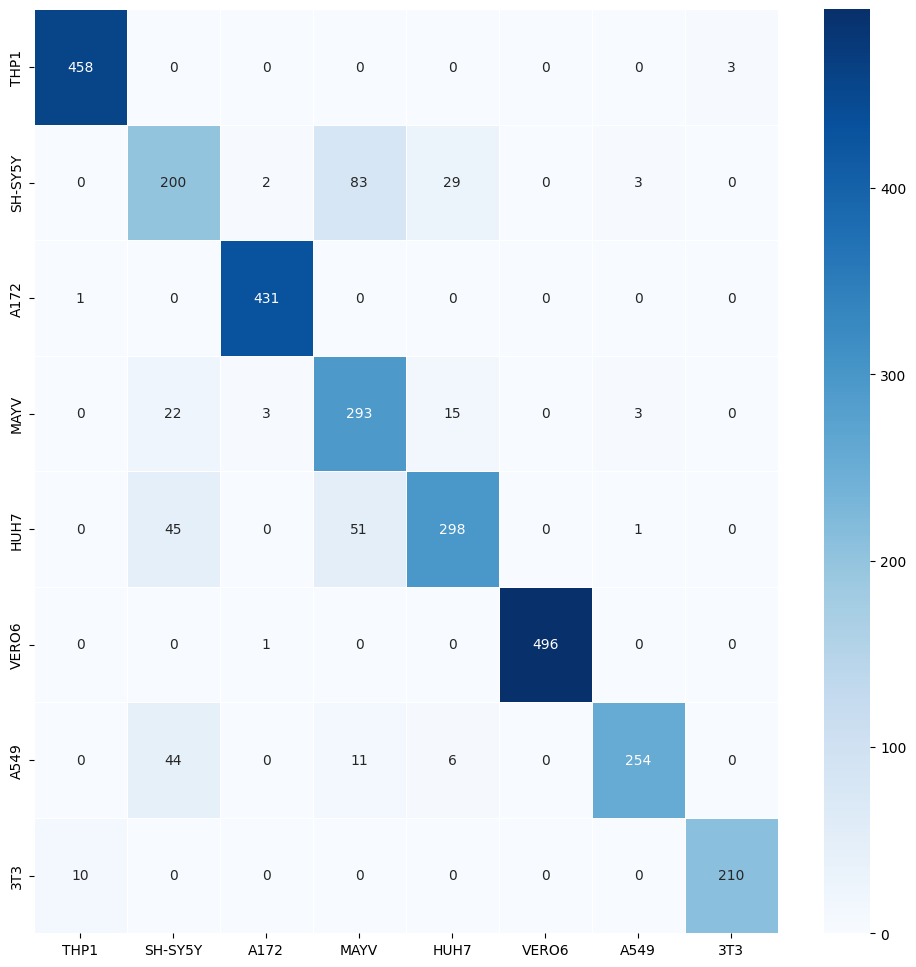

In [97]:
#plt.figure(figsize=(12,12))
#mask = mask_corr_graphic(len(prev[0]) -1)
fig, ax = plt.subplots(figsize=(12,12))
_ = sns.heatmap(data_heat, cmap = "Blues", linewidth = 0.5, annot = True, fmt=".0f")
#cmp = cor, linewidth = distancia das linhas, annot = valores nos quadrados, fmt = formato do valor, mark = retira os valores acima da matriz

In [98]:
#porcentagem da acurácia do modelo
precision = accuracy_score(y_test_matrix, y_pred_matrix)
print(f'Accuracy Score: {round(precision*100, 2)}%')

Accuracy Score: 88.8%


In [108]:
data = timeProcess()[1]
#model.save('/content/drive/MyDrive/Classificação_imagens_DOC_CNN/modelo_class_88.8_modelo_sem_filtro%_'+data+'.h5')

Classes e suas linhagens
1.   THP1
2.   SH-SY5Y
3.   A172
4.   MAYV
5.   DENV (HUH7)
6.   VERO6
7.   A549
8.   3T3



In [100]:
#avaliação do acerto de cada classe
classification = classification_report(y_test_matrix, y_pred_matrix)
print(classification)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       461
           1       0.64      0.63      0.64       317
           2       0.99      1.00      0.99       432
           3       0.67      0.87      0.76       336
           4       0.86      0.75      0.80       395
           5       1.00      1.00      1.00       497
           6       0.97      0.81      0.88       315
           7       0.99      0.95      0.97       220

    accuracy                           0.89      2973
   macro avg       0.89      0.88      0.88      2973
weighted avg       0.90      0.89      0.89      2973



In [101]:
# plt.figure(figsize=(12,12))
# mask = mask_corr_graphic(len(prev[0]) -1)
# sns.heatmap( #tipo do gráfico
#     confusion_matrix(y_test_matrix, y_pred_matrix),#dado
#     cmap="YlGnBu",
#     annot = True,
#     vmax=1, #ancorando mapa de cores
#     vmin=-1,
#     mask = mask
# )


# plt.title('Matriz de confusão')
# plt.ylabel('observado')
# plt.xlabel('predito')
# plt.show()

In [102]:
from sklearn.metrics import RocCurveDisplay


In [103]:
# RocCurveDisplay.from_predictions(
#     y_onehot_test[:, class_id],
#     y_score[:, class_id],
#     name=f"{class_of_interest} vs the rest",
#     color="darkorange",
# )
# plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
# plt.axis("square")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
# plt.legend()
# plt.show()

Predição

In [104]:
import cv2
import matplotlib.image as mpimg

In [105]:
#chamando o diretório com as imagens
previsao_imagens = "/content/drive/MyDrive/Imagens_doc_linhagens/Todas_imagens_class_predição"
lista_cell = os.listdir(previsao_imagens)
len(lista_cell) #lista das imagens

732

In [106]:
#lista_cell

1/1 [==============================] - 0s 273ms/step


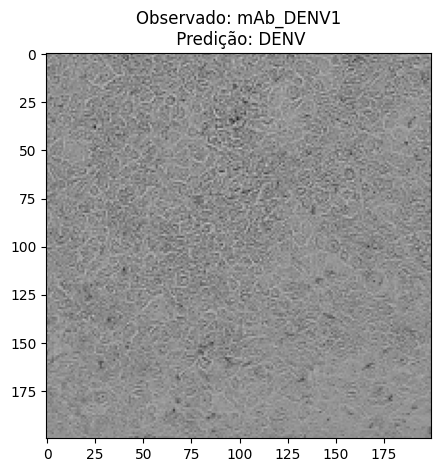

In [107]:
img_key = 200 #qual a chave a imagem
categorais = ['THP1', 'SH-SY5Y','A172','MAYV','DENV','VERO6','A549','HUH7','3T3']

resize_img = (200,200) #tamanho
image_test = previsao_imagens + '/' + lista_cell[img_key] #da onde essa imagem está vindo

y_classes_base = [n.split('campo_claro_')[1] for n in lista_cell] #cortando o nome da image
y_classes_base = [(n.split('.png')[0]) for n in y_classes_base]

#trabalhando com as dimensões e mudando para numpy
img = Image.open(image_test)
img = img.resize(resize_img)
img = np.asarray(img)[:,:,:3]
img_to_prd = np.expand_dims(img, axis=0)


#gerando o gráfico
pred_img = model.predict(img_to_prd)
med_img = y_classes_base[img_key]
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title(f"Observado: {med_img}\n Predição: " + categorais[y_pred_matrix[0]-1])
plt.show()